# Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [11]:
file_path = 'insurance_claims.csv'
insurance_claims = pd.read_csv(file_path)
insurance_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Clean and Preprocess the Dataset

In [13]:
# Check for missing values
missing_values = insurance_claims.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

# Replace '?' with NaN
import numpy as np
insurance_claims.replace('?', np.nan, inplace=True)

# Check the missing values again
missing_values_after_replacement = insurance_claims.isnull().sum()
missing_values_after_replacement[missing_values_after_replacement > 0]

# Fill missing values with the mode for categorical columns
for column in ['collision_type', 'property_damage', 'police_report_available']:
    mode_value = insurance_claims[column].mode()[0]
    insurance_claims[column].fillna(mode_value, inplace=True)

# Verify there are no more missing values
missing_values_final = insurance_claims.isnull().sum()
missing_values_final[missing_values_final > 0]


C:\Users\Asus\AppData\Local\Temp\ipykernel_15540\1272868355.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_claims[column].fillna(mode_value, inplace=True)


authorities_contacted    91
dtype: int64

# Exploratory Data Analysis (EDA)
## Trends in Claim Types and Amounts

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


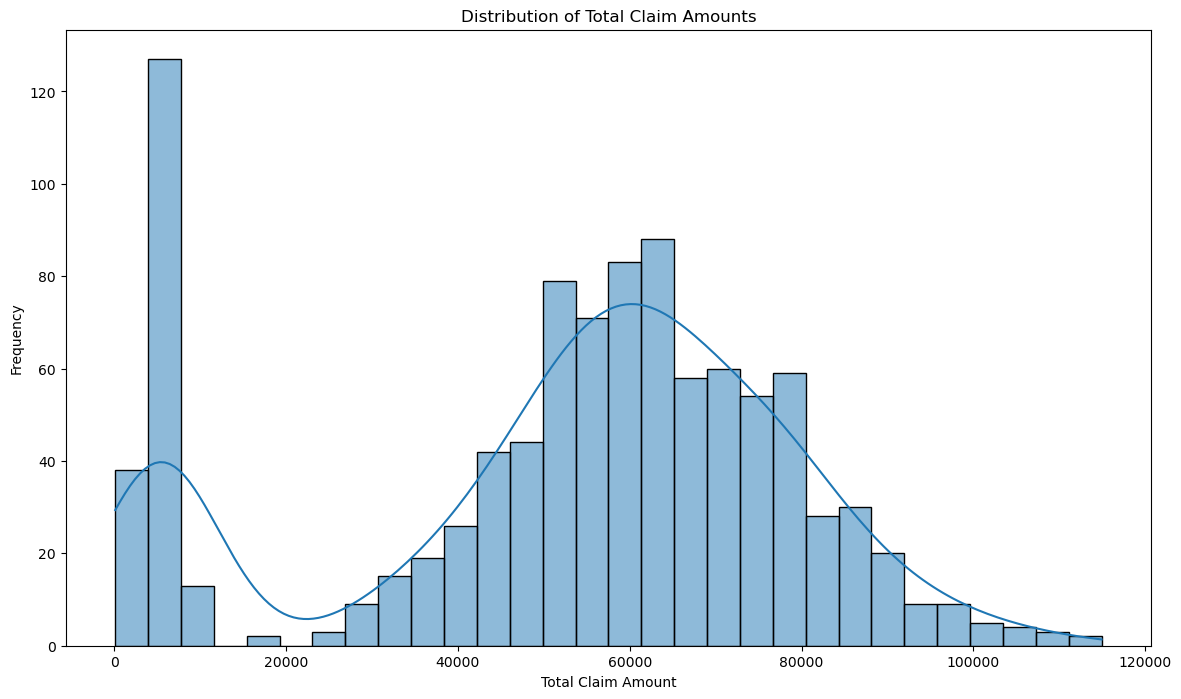

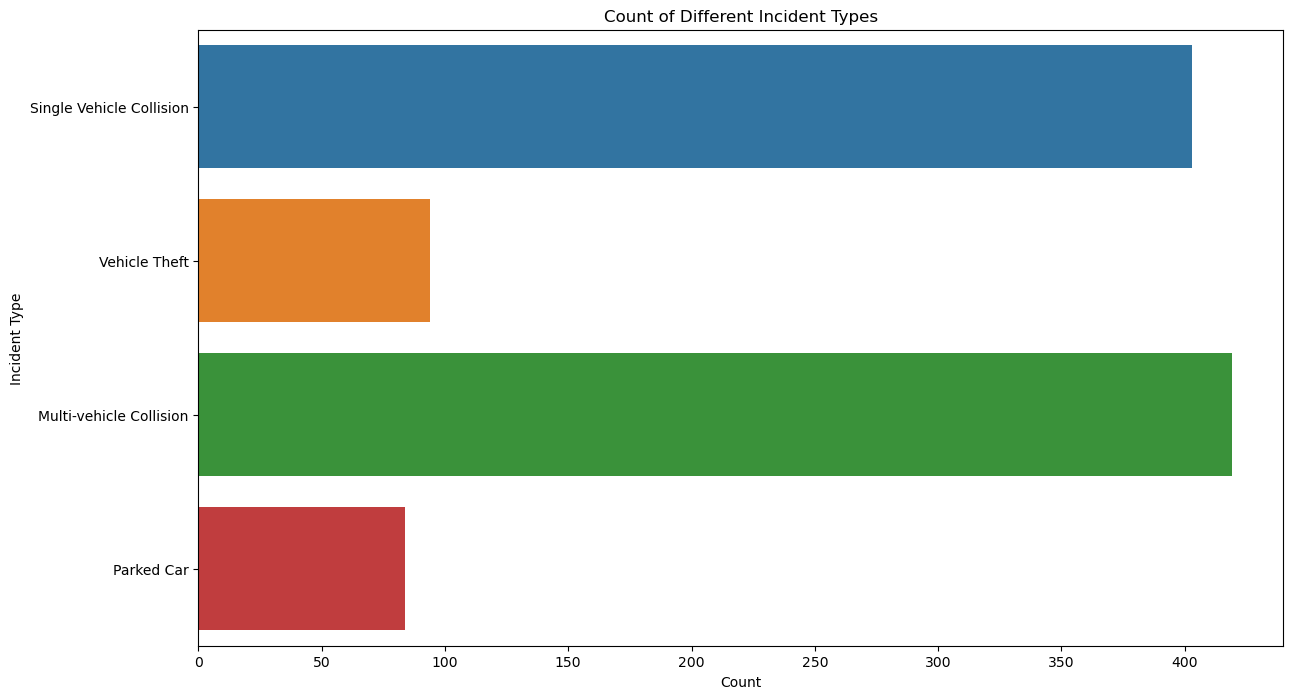

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the distribution of claim amounts
sns.histplot(insurance_claims['total_claim_amount'], bins=30, kde=True)
plt.title('Distribution of Total Claim Amounts')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the count of different claim types
plt.figure(figsize=(14, 8))
sns.countplot(y='incident_type', data=insurance_claims)
plt.title('Count of Different Incident Types')
plt.xlabel('Count')
plt.ylabel('Incident Type')
plt.show()


# Anomaly Detection

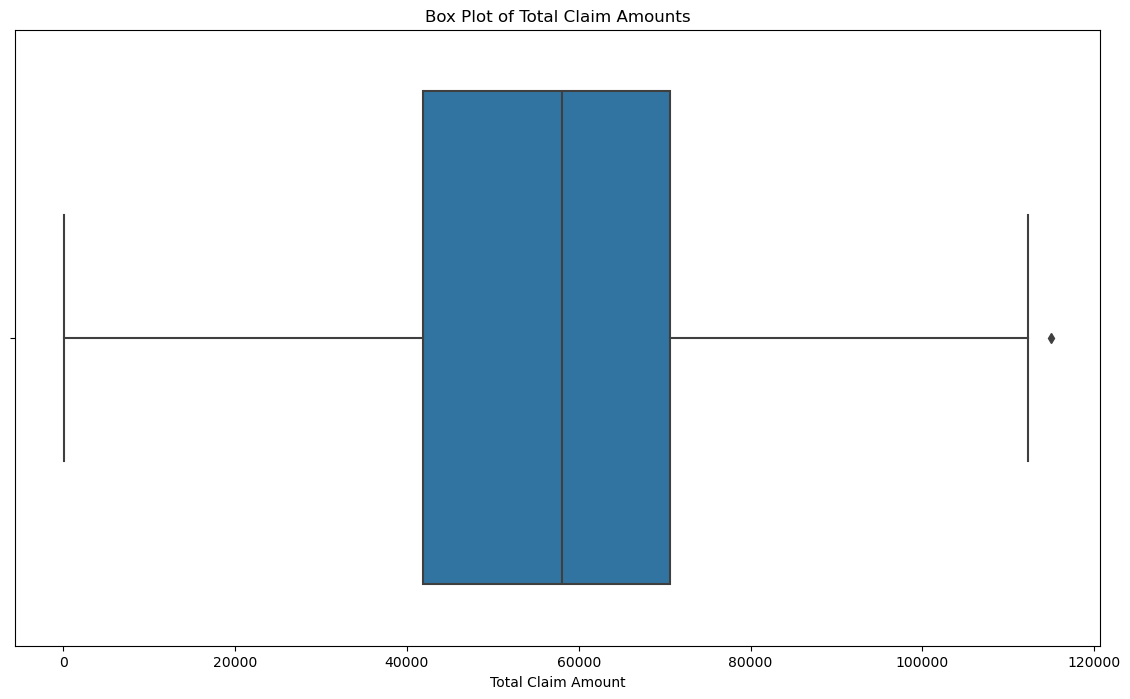

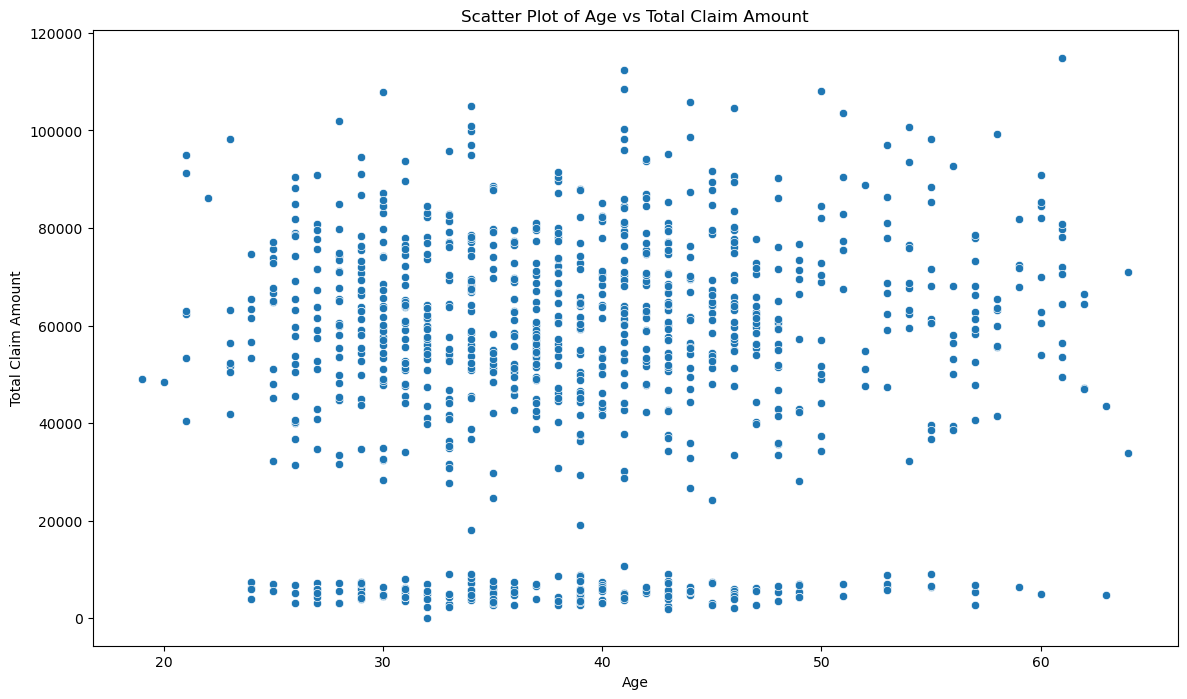

In [16]:
# Box plot to detect anomalies in total claim amount
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_claim_amount', data=insurance_claims)
plt.title('Box Plot of Total Claim Amounts')
plt.xlabel('Total Claim Amount')
plt.show()

# Scatter plot to detect anomalies in relation to age
plt.figure(figsize=(14, 8))
sns.scatterplot(x='age', y='total_claim_amount', data=insurance_claims)
plt.title('Scatter Plot of Age vs Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()


# Analyzing Claims Processing Times (if available)

In [17]:
# Check if there's a column for claims processing time
if 'claims_processing_time' in insurance_claims.columns:
    # Plot the distribution of claims processing times
    plt.figure(figsize=(14, 8))
    sns.histplot(insurance_claims['claims_processing_time'], bins=30, kde=True)
    plt.title('Distribution of Claims Processing Times')
    plt.xlabel('Claims Processing Time (days)')
    plt.ylabel('Frequency')
    plt.show()

    # Box plot to detect anomalies in claims processing time
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='claims_processing_time', data=insurance_claims)
    plt.title('Box Plot of Claims Processing Times')
    plt.xlabel('Claims Processing Time (days)')
    plt.show()
else:
    # If the column doesn't exist, inform the user
    print("The dataset does not contain a 'claims_processing_time' column.")


The dataset does not contain a 'claims_processing_time' column.


# Comparison of Fraudulent and Non-Fraudulent Claims

In [21]:
# Select only the numeric columns for aggregation
numeric_columns = insurance_claims.select_dtypes(include=[np.number]).columns

# Compare characteristics of fraudulent and non-fraudulent claims
fraud_analysis = insurance_claims.groupby('fraud_reported')[numeric_columns].mean()

# Display the comparison
print(fraud_analysis)


                months_as_customer        age  policy_number  \
fraud_reported                                                 
N                       202.600266  38.884462  550571.297477   
Y                       208.080972  39.141700  533030.206478   

                policy_deductable  policy_annual_premium  umbrella_limit  \
fraud_reported                                                             
N                     1130.810093            1258.430000    1.023904e+06   
Y                     1151.821862            1250.236275    1.336032e+06   

                  insured_zip  capital-gains  capital-loss  \
fraud_reported                                               
N               500419.537849   25432.005312 -26554.581673   
Y               503637.959514   24193.522267 -27522.672065   

                incident_hour_of_the_day  number_of_vehicles_involved  \
fraud_reported                                                          
N                              11.626826   

# Analysis of Fraudulent Claims

In [23]:
# Encode the target variable 'fraud_reported' as binary
insurance_claims['fraud_reported_binary'] = insurance_claims['fraud_reported'].map({'Y': 1, 'N': 0})

# Select only numeric columns
numeric_columns = insurance_claims.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix using only numeric columns
correlation_matrix = insurance_claims[numeric_columns].corr()

# Extract correlations with the 'fraud_reported_binary' column
fraud_correlations = correlation_matrix['fraud_reported_binary'].sort_values(ascending=False)
fraud_correlations


fraud_reported_binary          1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
policy_number                 -0.029443
Name: fraud_reported_binary, dtype: float64

# Feature Importance Using a Classification Model

In [24]:
# Encode categorical features
categorical_features = insurance_claims.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_features}

for col in categorical_features:
    insurance_claims[col] = label_encoders[col].fit_transform(insurance_claims[col])

# Prepare the data for modeling
X = insurance_claims.drop(columns=['fraud_reported', 'fraud_reported_binary'])
y = insurance_claims['fraud_reported_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances


incident_severity              0.185104
insured_hobbies                0.066129
property_claim                 0.041000
policy_annual_premium          0.039106
insured_zip                    0.036975
policy_number                  0.036216
vehicle_claim                  0.035269
incident_date                  0.034826
injury_claim                   0.033508
months_as_customer             0.032641
total_claim_amount             0.032026
incident_location              0.030942
policy_bind_date               0.028961
auto_model                     0.028269
insured_occupation             0.028186
age                            0.027887
incident_hour_of_the_day       0.025587
auto_year                      0.025457
auto_make                      0.020890
umbrella_limit                 0.020252
capital-gains                  0.019259
capital-loss                   0.018800
incident_state                 0.015671
insured_relationship           0.015431
incident_city                  0.015202


# Visualization of Key Factors

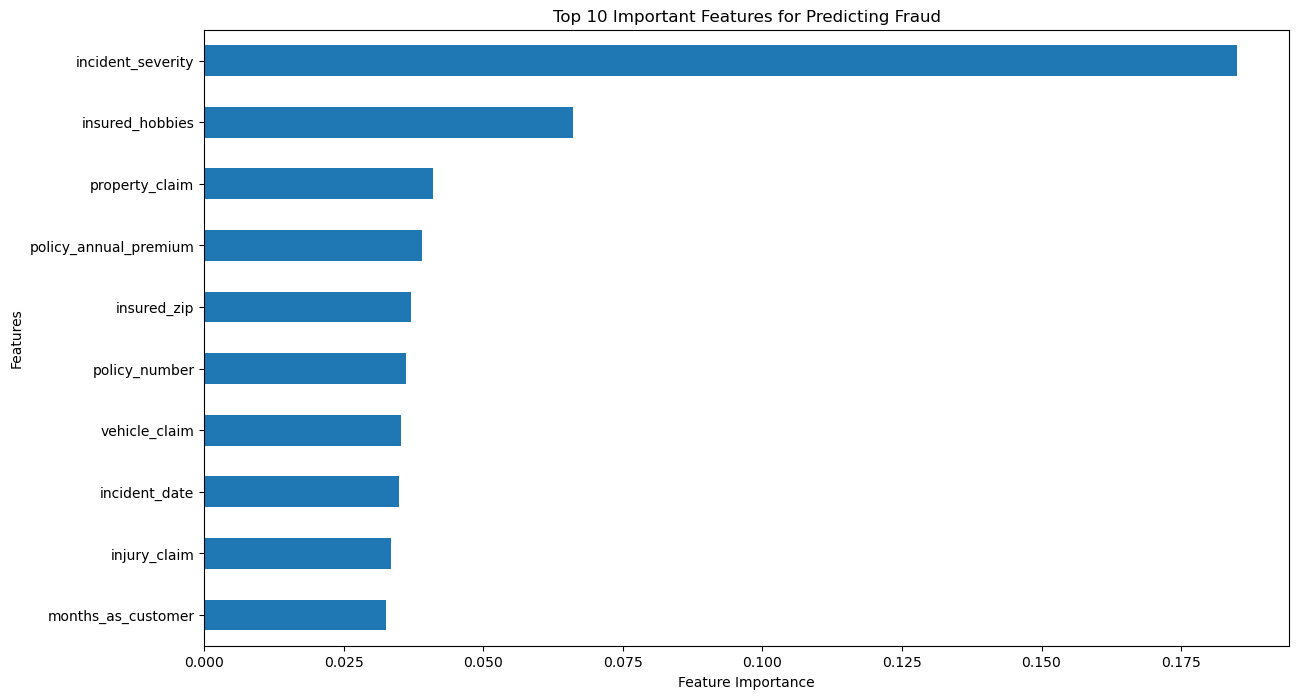

In [25]:
# Plot the top 10 important features
top_features = feature_importances.head(10)

plt.figure(figsize=(14, 8))
top_features.plot(kind='barh')
plt.title('Top 10 Important Features for Predicting Fraud')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


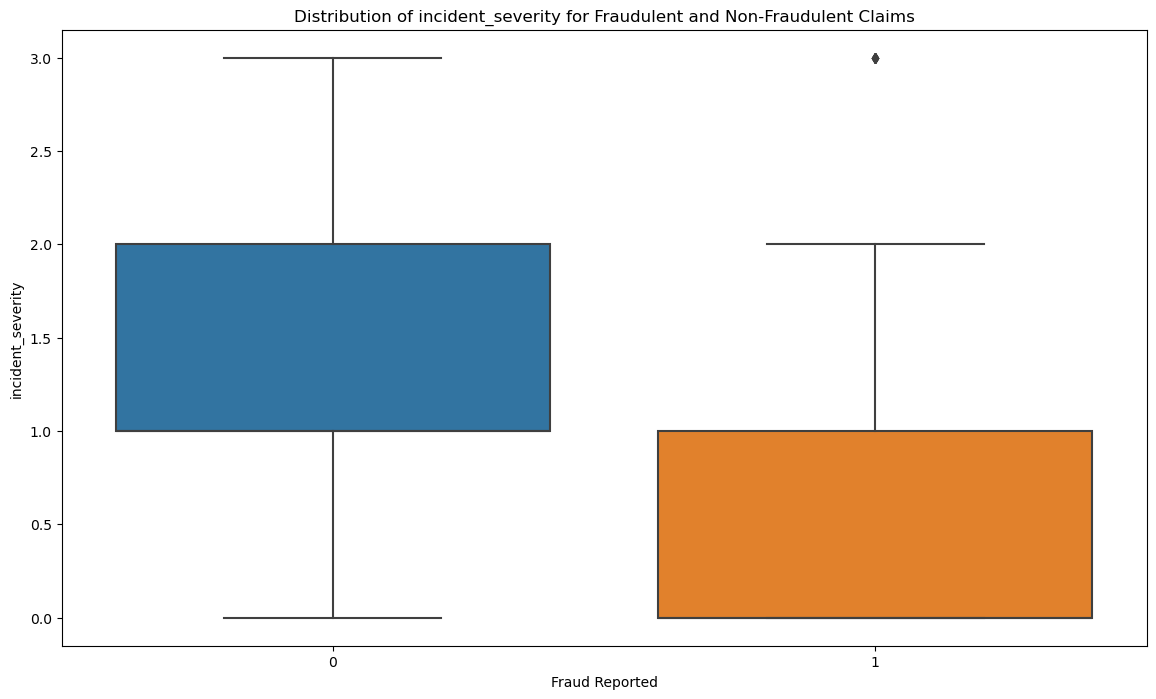

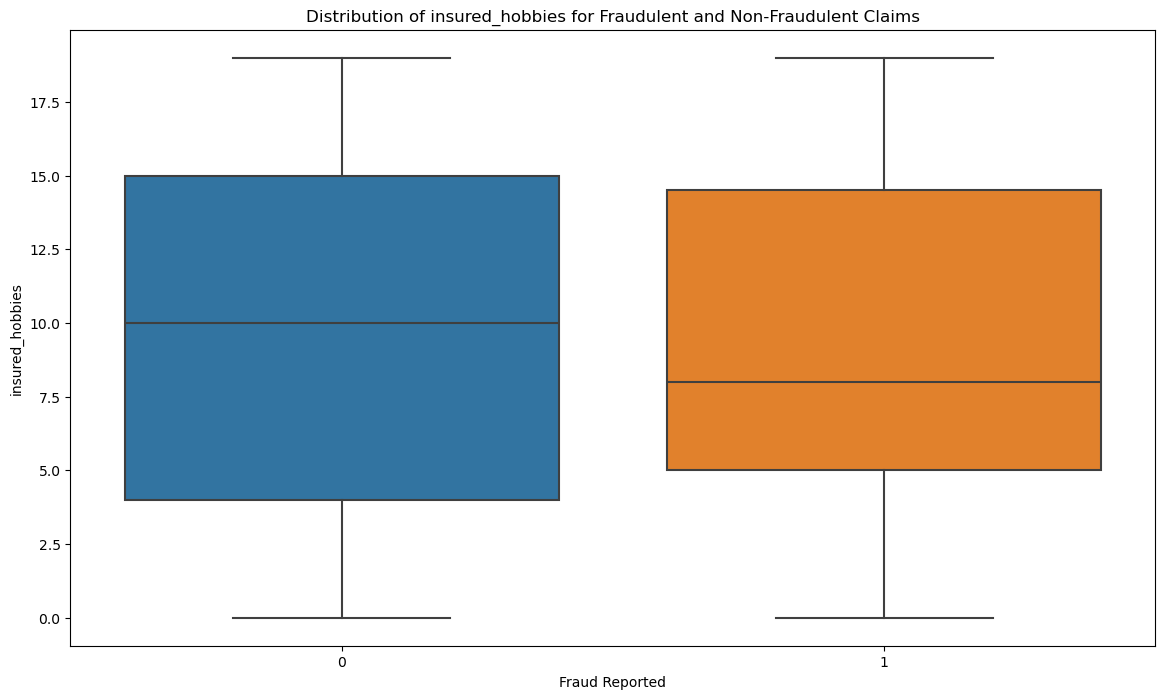

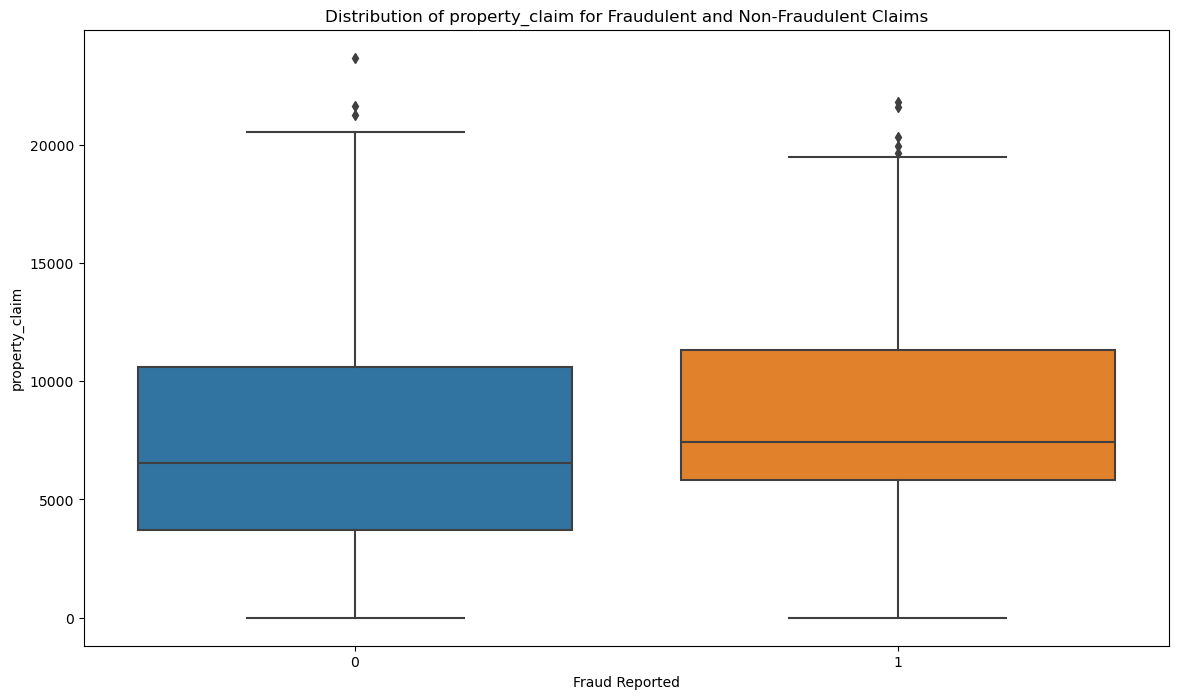

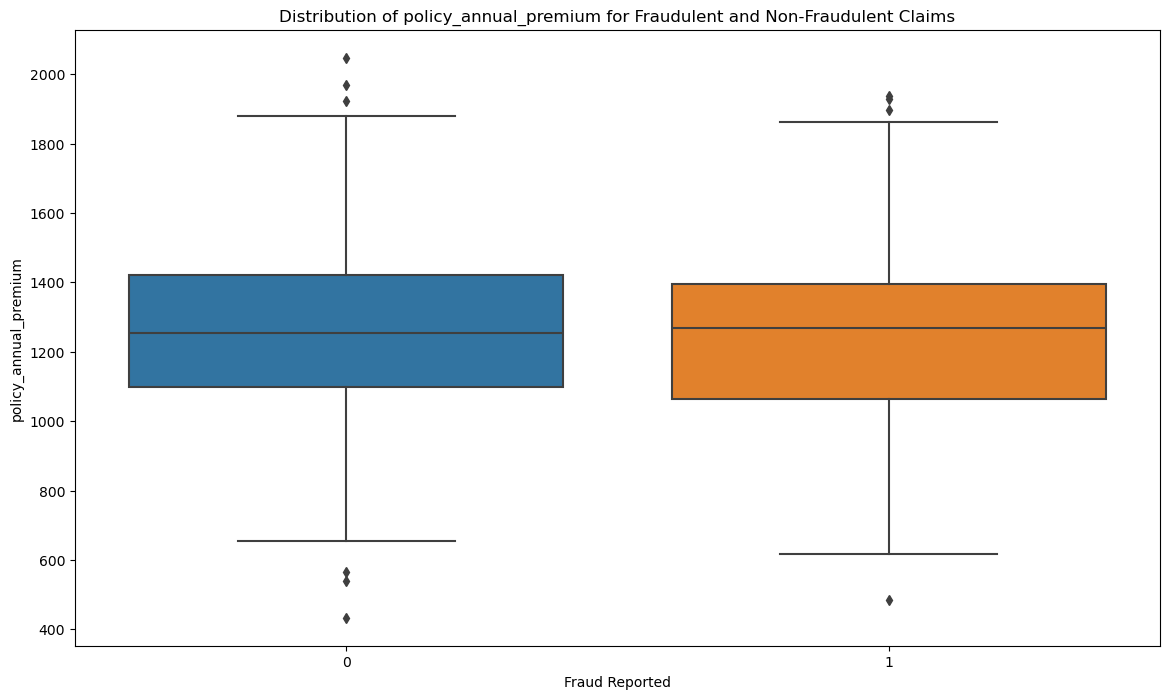

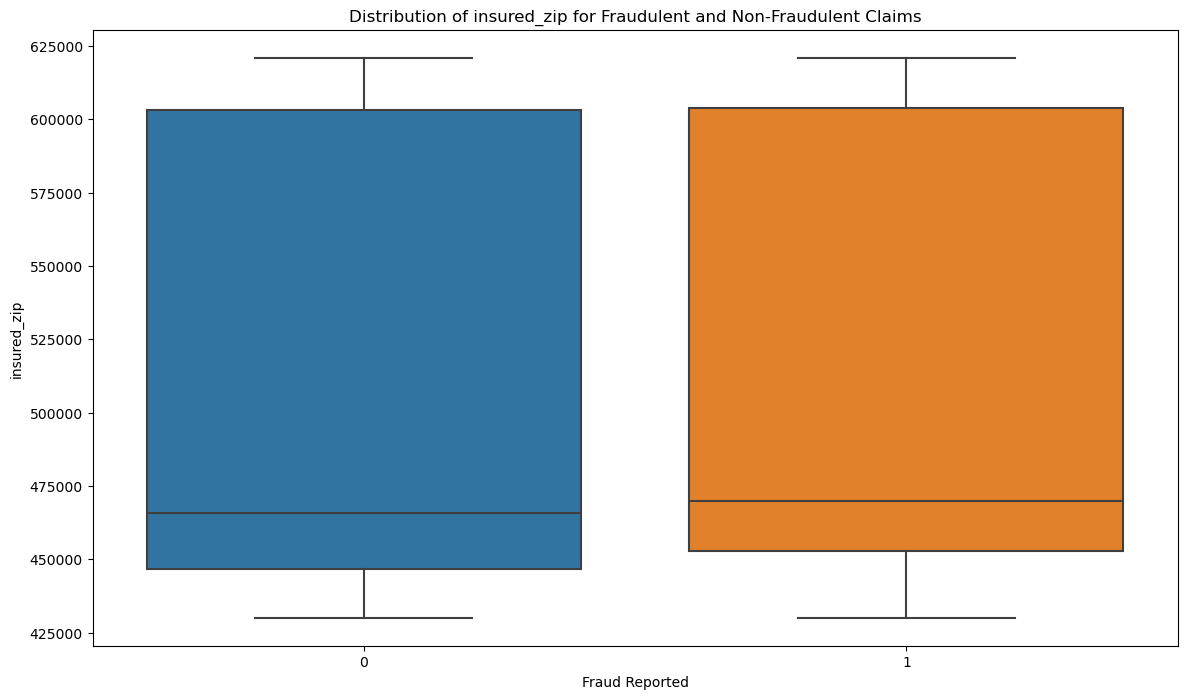

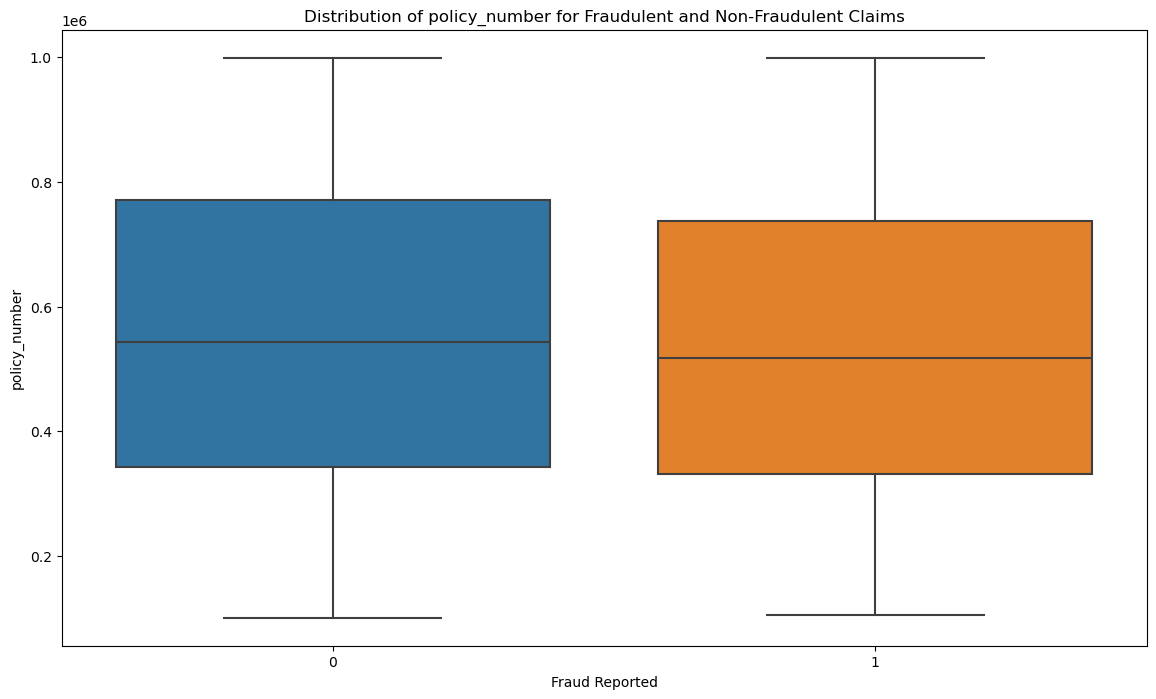

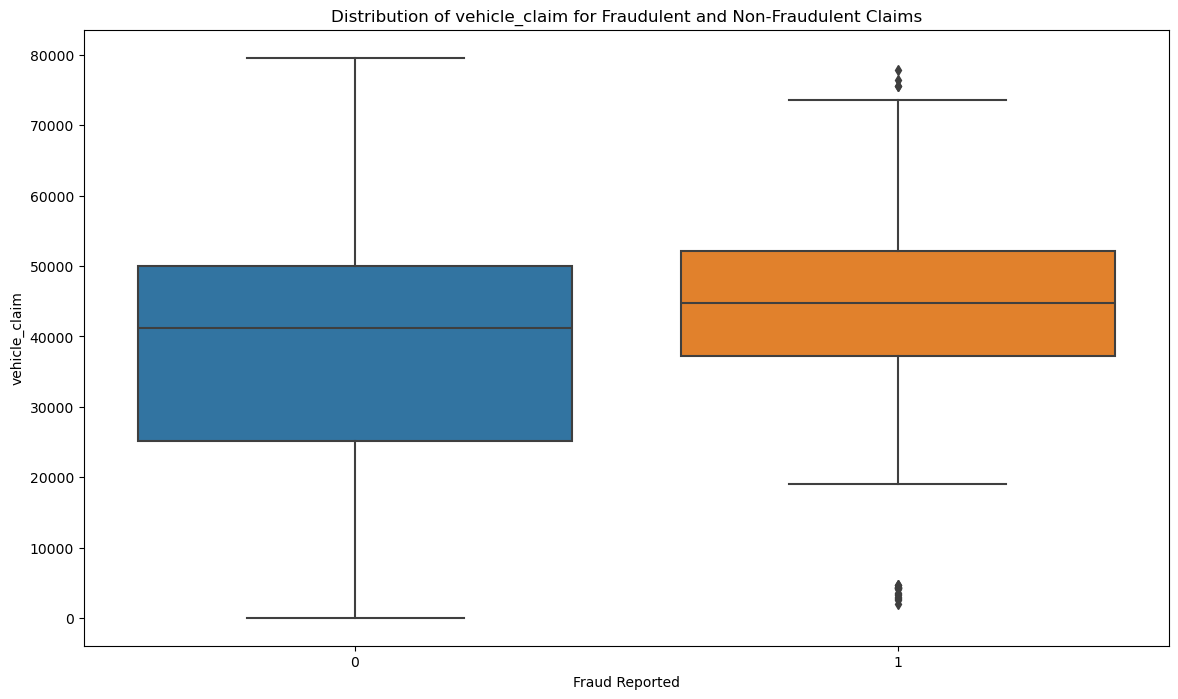

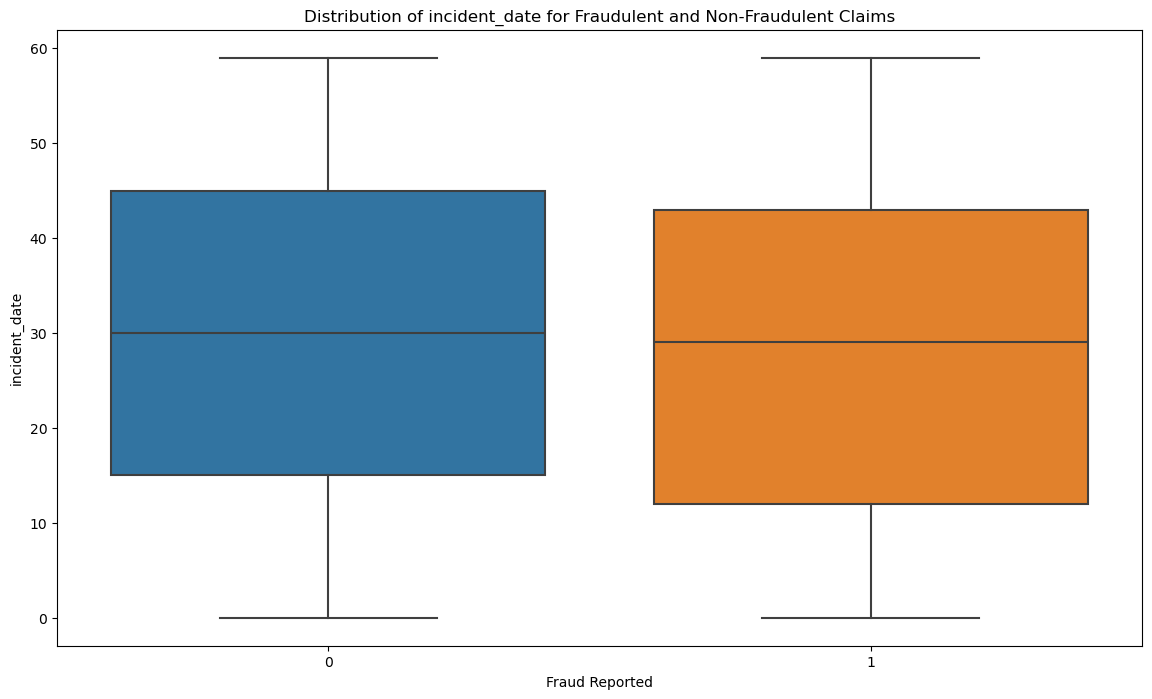

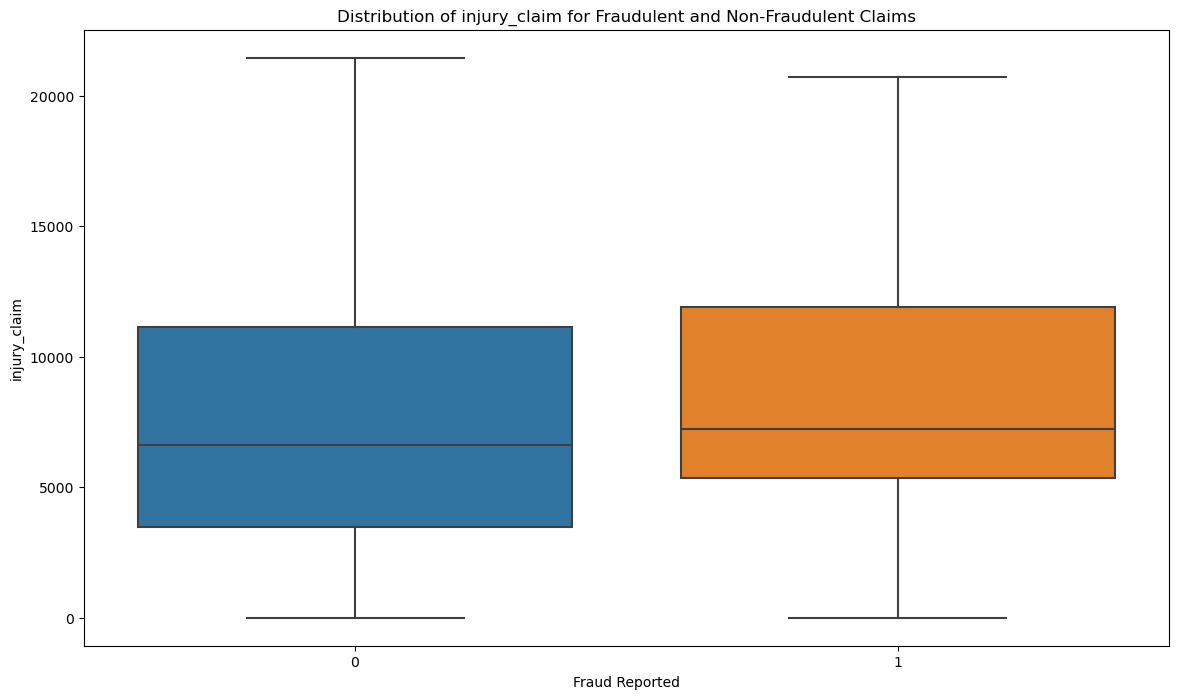

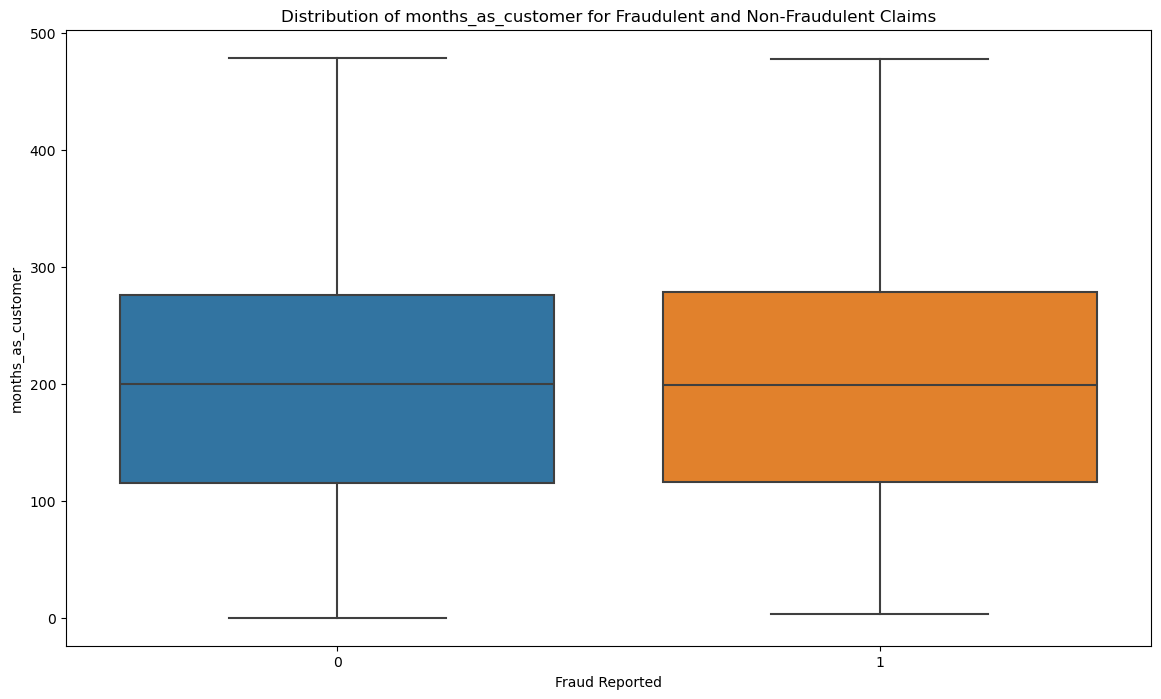

In [26]:
# Select top features for visualization
selected_features = top_features.index

# Visualize the distribution of key features for fraudulent and non-fraudulent claims
for feature in selected_features:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='fraud_reported', y=feature, data=insurance_claims)
    plt.title(f'Distribution of {feature} for Fraudulent and Non-Fraudulent Claims')
    plt.xlabel('Fraud Reported')
    plt.ylabel(feature)
    plt.show()
